### Fitting problem 2

The data for this problem is available in the file `fit_2.dat` which can be downloaded from http://www.eg.bucknell.edu/~phys310/hw/hw4.html. One option is to download the data file to a local directory, and then import it using `np.loadtxt()`. Another option is to download it directly into the Jupyter notebook. I will use the second option here.

In [7]:
import numpy as np
from scipy import optimize

import urllib  # for importing data from URL

import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
# Following is an Ipython magic command that puts figures in notebook.
#   next line is  compatible with html but does not include figures in pdf-file
%matplotlib notebook
#    use next line, if you want to download pdf-file of this notebook
#%matplotlib inline
        
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Define linear model to be used in this problem

In [9]:
def f(x, m, b):
    return m*x + b

####  Options for getting data into notebook
+ Start by downloading the data files into the working directory. The `np.loadtxt` 
function imports the content of the data file into a `numpy` array.
The `unpack = 'True'` option transposes the array so that each column is in 
a separate array.
+ Download directly from a URL

In this notebook I use the second option.

In [10]:
g = urllib.request.urlopen('https://www.eg.bucknell.edu/~phys310/hw/assignments/fitting_2/fit_2.dat')
data = np.loadtxt(g)

Data is for an experiment in which there is a suspected linear relationship between measured values of $x$ and $y$. The data for each point is on a single line in the file. The first number on each line is the value of $x$, the second is the value of $y$, and the third is the uncertainty in $y$. Uncertainties in $x$ are assumed to be negligible. 

#### (a) Perform a fit to these data using the generic optimize.curve_fit routine from scipy that we demonstrated in class. Pllot the best-fit line along with the data. 

In [11]:
x, y, u = data.T
x, y, u

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]),
 array([-2.3769056 ,  7.92885824,  5.34467316,  9.91042275, 17.66468125,
        21.46520755, 18.01874527, 26.90025497, 28.84860726, 28.65941622,
        32.29238084, 42.62458887, 34.13938174, 37.79735144, 39.99839511,
        43.3382976 , 49.17159323, 46.51257318, 50.34226852, 48.96066554]),
 array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4.]))

#### Perform fit

In [12]:
popt, pcov = optimize.curve_fit(f, x, y, sigma=u, absolute_sigma=True)
print(popt)  # print the best fit parameters
print(pcov)  # print the covariance matrix
for i in range(len(pcov)):
    print(np.sqrt(pcov[i,i])) # print the uncertainties in fit parameters

[2.62644421 1.79940866]
[[ 0.02406016 -0.25263162]
 [-0.25263162  3.45263185]]
0.15511336238644136
1.858125896956121


#### Best fit parameters:

$m = 2.63 \pm 0.16$

$b =  1.8 \pm 1.8$

<IPython.core.display.Javascript object>


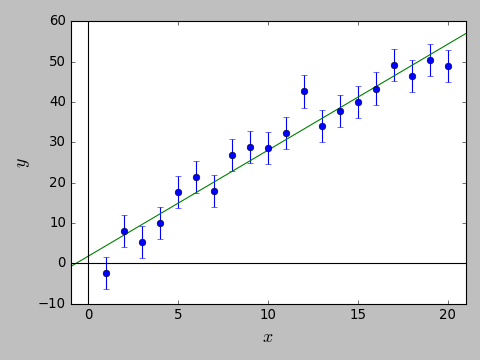

In [13]:
plt.figure()
plt.errorbar(x,y,u,fmt='o')
xc = np.linspace(-1,21,10)
yc = f(xc,*popt)
plt.plot(xc,yc)
plt.xlim(-1,21)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='k')
plt.axvline(0, color='k');

#### (b) Plot your residuals. How many of the data points lie within 1 $\alpha$ of the line you determined?

<IPython.core.display.Javascript object>


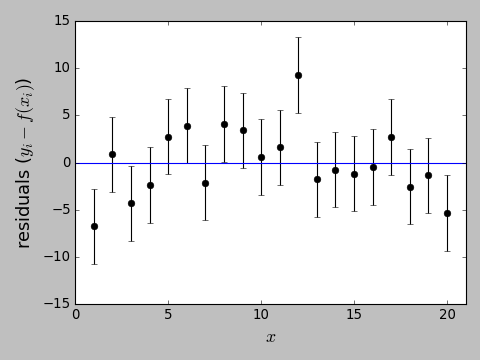

In [16]:
plt.figure()
r = y-f(x,*popt)      # Calculate residuals
plt.errorbar(x,r,u, fmt = 'ko')
plt.axhline(0)
plt.xlabel('$x$')
plt.ylabel('residuals ($y_i - f(x_i)$)')
plt.xlim(0,21);

By inspection of the graph, I count 5 values for which 0 is not included within the error bars, and 
15 for which it is.

I could make the computer do the counting:

In [15]:
# METHOD 1

cnt = 0
for j in range(len(r)):
    if  np.abs(r[j]) < u[j]:
        cnt += 1

print(cnt, 'of the', len(r), 'residuals are within 1 alpha_i of 0')

15 of the 20 residuals are within 1 alpha_i of 0


#### (b) Plot your normalized residuals. How many of the data points lie within $\pm 1$?

<IPython.core.display.Javascript object>


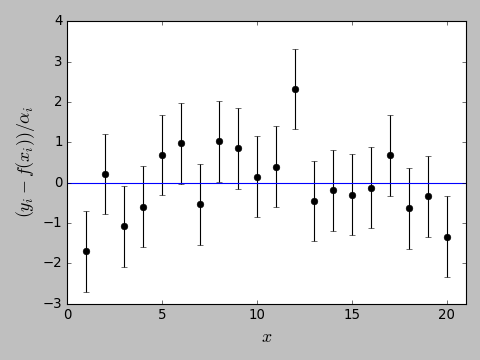

15 of the 20 residuals are within 1 alpha_i of 0


In [27]:
# METHOD 2
r_norm = r/u  # normalized residuals

plt.figure()
plt.errorbar(x,r_norm,1, fmt = 'ko')
plt.axhline(0)
plt.xlabel('$x$')
plt.ylabel('$(y_i - f(x_i))/\\alpha_i$')
plt.xlim(0,21);

cnt = np.sum(abs(r_norm) < 1)
print(cnt, 'of the', len(r_norm), 'residuals are within 1 alpha_i of 0')


#### (c) Use Eq. (5.9) from Hughes & Hase and calculate the goodness-of-fit parameter chi squared for this data?

$$ \chi^2 = \sum_i\left(\frac{y_i - y(x_i)}{\alpha_i}\right)^2 $$ 


In [28]:
chi2 = np.sum(r**2/u**2)
print(chi2, len(r))

16.69165778954491 20


#### (d) Given your analysis, does a linear fit to the data appear to be reasonable? Comment briefly.

The goodness of fit parameter is $\chi^2 = 16.7$, which is just under the number of data points.
This indicates that the data is consistent with linear model, so the best fit parameters 
determined above are good values for the slope and intercept of a line.
We also could conclude from Fig.2 (residuals as function of $x_i$) that the residuals fluctuate around $0$ and that there seem to be no systematic discrepancy and therefore that the linear fit is a good fit.

#### (e) What value do you quote for the slope and intercept based on the data? (Include uncertainties)

(see above)

#### Best fit parameters:

$m = 2.63 \pm 0.16$

$b =  1.8 \pm 1.8$

#### System information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [29]:
%load_ext version_information

In [30]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1127.19.1.el7.x86_64 x86_64 with centos 7.9.2009 Core
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Wed Feb 09 21:34:32 2022 EST